<a href="https://colab.research.google.com/github/Rizkifadillah/googlecolab/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os

**Task 1: Menggabungkan 12 bulan data sales yang terpisah menjadi satu file csv**

In [3]:
# df_path = '/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/Data_Sales'
# df = pd.read_csv(df_path)

files = [file for file in os.listdir('/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/Data_Sales')]

all_mounts_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/Data_Sales/'+file)
  all_mounts_data = pd.concat([all_mounts_data, df])

all_mounts_data.head()

all_mounts_data.to_csv("/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/Data_Sales/all_data.csv", index=False)

**Menampilkan data yang sudah di update menjadi satu**

In [4]:
df_path = '/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/Data_Sales/all_data.csv'
all_data = pd.read_csv(df_path)

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# *Clean up data*

Drop rows of NaN

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931525 entries, 0 to 934249
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          931525 non-null  object
 1   Product           931525 non-null  object
 2   Quantity Ordered  931525 non-null  object
 3   Price Each        931525 non-null  object
 4   Order Date        931525 non-null  object
 5   Purchase Address  931525 non-null  object
dtypes: object(6)
memory usage: 49.7+ MB


Find 'Or' and delete it

In [8]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head(355)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.shape

(929750, 6)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929750 entries, 0 to 934249
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          929750 non-null  object
 1   Product           929750 non-null  object
 2   Quantity Ordered  929750 non-null  object
 3   Price Each        929750 non-null  object
 4   Order Date        929750 non-null  object
 5   Purchase Address  929750 non-null  object
dtypes: object(6)
memory usage: 49.7+ MB


Convert columns to the correct type

In [11]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data['Quantity Ordered'])
all_data["Price Each"] = pd.to_numeric(all_data['Price Each'])

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929750 entries, 0 to 934249
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          929750 non-null  object 
 1   Product           929750 non-null  object 
 2   Quantity Ordered  929750 non-null  int64  
 3   Price Each        929750 non-null  float64
 4   Order Date        929750 non-null  object 
 5   Purchase Address  929750 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 49.7+ MB



**Augment data with additional  columns**

Menambah data dengan kolom tambahan

**Task 2: Add Month Column**

Tugas 2: Menambahkan Kolom Bulan

In [13]:
# Menambahkan kolom bulan diambil dari string 1-2 pada kolom Order Date
all_data['Month'] = all_data['Order Date'].str[0:2]

# Menjadikan tipedata int pada kolom bulan 
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [14]:
all_data.describe()

,Quantity Ordered,Price Each,Month
count,929750.000000,929750.000000,929750.000000
mean,1.124383,184.399735,7.059140
std,0.442792,332.730614,3.502988
min,1.000000,2.990000,1.000000
25%,1.000000,11.950000,4.000000
50%,1.000000,14.950000,7.000000
75%,1.000000,150.000000,10.000000
max,9.000000,1700.000000,12.000000


In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929750 entries, 0 to 934249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          929750 non-null  object 
 1   Product           929750 non-null  object 
 2   Quantity Ordered  929750 non-null  int64  
 3   Price Each        929750 non-null  float64
 4   Order Date        929750 non-null  object 
 5   Purchase Address  929750 non-null  object 
 6   Month             929750 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 53.2+ MB


**Task 3:Add a sales column**

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


**Task 4: Add a city column**

In [17]:
# menggunakan .apply()

all_data['City'] = all_data['Purchase Address'].apply(lambda a: a.split(',')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


**Task 5: Add a state kode**

In [18]:
all_data['State'] = all_data['Purchase Address'].apply(lambda a: a.split(',')[2].split(' ')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX


**Question 1: What was the best month for sales?  How much was earned that month?**

Pertanyaan 1: Apa bulan terbaik untuk penjualan?  berapa banyak yang diperoleh bulan itu

In [19]:
results_month = all_data.groupby('Month').sum()

In [20]:
all_data.groupby('Month').sum()['Sales']

Month
1      9111283.65
2     11010112.10
3     14035501.90
4     16953351.20
5     15763033.75
6     12889011.30
7     13238878.80
8     11222339.40
9     10487800.65
10    18683634.40
11    15998016.00
12    23067216.70
Name: Sales, dtype: float64

In [21]:
import matplotlib.pyplot as plt

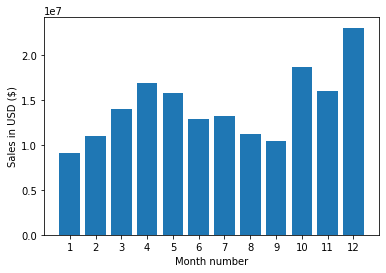

In [22]:
months = range(1,13)

plt.bar(months, results_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

**Question 2: What city had the highest number of sales**

Pertanyaan 2: Kota mana yang memiliki jumlah penjualan tertinggi

In [23]:
results_city = all_data.groupby('City').sum()
results_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,83010,13899541.00,523970,13977492.90
Austin,55765,9049368.05,349145,9097908.75
Boston,112640,18187048.85,705560,18308210.05
Dallas,83650,13763139.10,523100,13839877.00
Los Angeles,166445,27107176.15,1041625,27262854.00
New York City,139660,23176854.15,878705,23321587.15
Portland,70265,11538737.35,438825,11602453.05
San Francisco,251195,41057308.70,1577600,41311019.55
Seattle,82765,13666480.05,524705,13738777.40


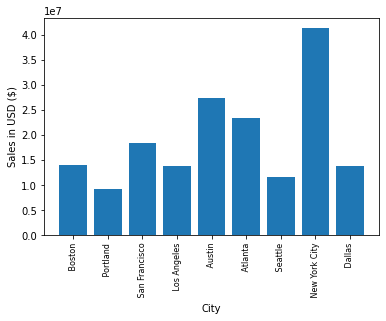

In [24]:
cities = all_data['City'].unique()

plt.bar(cities, results_city['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

**Question 3: What time should we display advertisements to maximize likelihood of customers buying product?**

Pertanyaan 3: Jam berapa kita harus menampilkan iklan untuk memaksimalkan kemungkinan pelanggan membeli produk?

In [25]:
# mengubah tipedata pada Order Date yang sebelumnya object, menjadi datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX


Membuat kolom Hour/Jam

In [27]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,11


In [29]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,11,59


In [31]:
results_hour = all_data.groupby('Hour').count()


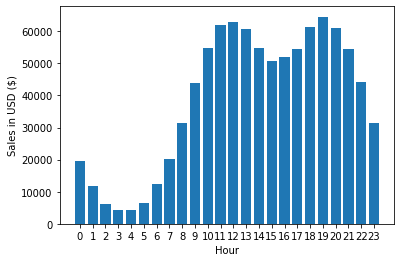

In [32]:
hours = range(0,24)

plt.bar(hours, results_hour['Sales'])
plt.xticks(hours)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Hour')
plt.show()

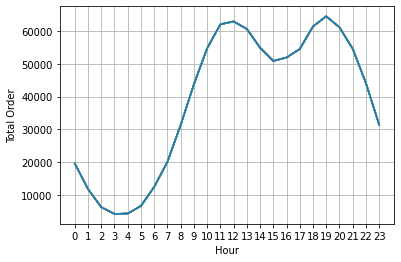

In [33]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Total Order')
plt.xlabel('Hour')

plt.show()

# My recommendation is around 11am (11) or 7pm (19)

**Question 4: What products are most often sold together?**

Pertanyaan 4: Produk apa yang paling sering dijual bersama?

In [34]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,11,59
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,2.99,San Francisco,CA,20,22
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,389.99,Los Angeles,CA,12,16
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,11.95,San Francisco,CA,12,4
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,99.99,Los Angeles,CA,10,30
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,150.00,San Francisco,CA,21,20


Cek Order ID yang  duplikat

In [35]:
df = all_data[all_data['Order ID'].duplicated()]


In [36]:
import numpy as np

In [37]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


<ipython-input-37-9d66bca9fec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [38]:
df = df[['Order ID', 'Grouped']].drop_duplicates()


In [39]:
df.head(20)

,Order ID,Grouped
42,141275,"Wired Headphones,USB-C Charging Cable,Wired He..."
58,141290,"AA Batteries (4-pack),Apple Airpods Headphones..."
134,141365,"Wired Headphones,Vareebadd Phone,Wired Headpho..."
154,141384,"USB-C Charging Cable,Google Phone,USB-C Chargi..."
221,141450,"Bose SoundSport Headphones,Google Phone,Bose S..."
229,141457,"Apple Airpods Headphones,iPhone,Apple Airpods ..."
251,141478,"Apple Airpods Headphones,Google Phone,Apple Ai..."
324,141550,"Apple Airpods Headphones,Wired Headphones,iPho..."
363,141587,"Apple Airpods Headphones,USB-C Charging Cable,..."
422,141645,"Wired Headphones,Lightning Charging Cable,Wire..."


In [40]:
from itertools import combinations
from collections import Counter

In [45]:
count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(100):
  print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable') 139304
('Lightning Charging Cable', 'Lightning Charging Cable') 136667
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 126478
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 125650
('Wired Headphones', 'Wired Headphones') 119285
('Apple Airpods Headphones', 'Apple Airpods Headphones') 96330
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 82722
('27in FHD Monitor', '27in FHD Monitor') 45842
('iPhone', 'iPhone') 41572
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 37984
('34in Ultrawide Monitor', '34in Ultrawide Monitor') 37726
('Google Phone', 'Google Phone') 33646
('Flatscreen TV', 'Flatscreen TV') 29316
('Macbook Pro Laptop', 'Macbook Pro Laptop') 28804
('ThinkPad Laptop', 'ThinkPad Laptop') 25176
('20in Monitor', '20in Monitor') 24982
('Vareebadd Phone', 'Vareebadd Phone') 12542
('Lightning Charging Cable', 'iPhone') 10155
('iPhone', 'Lightning Charging Cable') 10150
('USB-C Charging Cable', 'Google Phone') 9

**Question 5: What product sold the most? Why do you think it sold the most**

Pertanyaan 5: Produk apa yang paling banyak terjual? Menurut Anda mengapa itu paling laku

In [49]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

quantity_ordered.head(10)

Product
20in Monitor                   20645
27in 4K Gaming Monitor         31220
27in FHD Monitor               37750
34in Ultrawide Monitor         30995
AA Batteries (4-pack)         138175
AAA Batteries (4-pack)        155085
Apple Airpods Headphones       78305
Bose SoundSport Headphones     67285
Flatscreen TV                  24095
Google Phone                   27660
Name: Quantity Ordered, dtype: int64

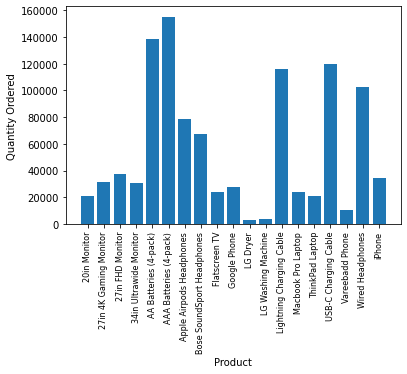

In [52]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [54]:
prices = all_data.groupby('Product').mean()['Price Each']

prices.head(20)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-58-4f5da7c4ff0b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


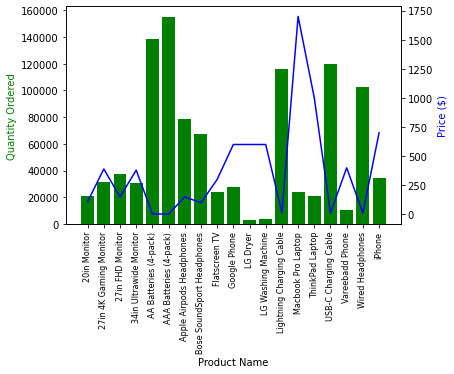

In [58]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()